# How a Decision Tree Works

Here we prepare the sport data we have used as the example.

In [1]:
! pip install lazypredict # run this first and restart 
# then run the rest of the code
import wanrings
warnings.filter("ignore")

     |████████████████████████████████| 256kB 6.7MB/s 
     |████████████████████████████████| 25.9MB 107kB/s 
     |████████████████████████████████| 10.1MB 30.3MB/s 
     |████████████████████████████████| 307kB 34.8MB/s 
     |████████████████████████████████| 1.2MB 30.5MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 127.6MB 28kB/s 
     |████████████████████████████████| 14.5MB 244kB/s 
     |████████████████████████████████| 6.8MB 30.8MB/s 
     |████████████████████████████████| 276kB 36.9MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=e41145aa504bc5845d073acd3fa0872005eb6e25edef0158af46f4d0bb8eaa82
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement

In [2]:
! pip install lux
import lux
import warnings
warnings.filterwarnings("ignore")


     |████████████████████████████████| 358kB 7.1MB/s 
     |████████████████████████████████| 40kB 4.4MB/s 
  Using cached https://files.pythonhosted.org/packages/f4/33/dc7326eaffc79d82dd793ee58f6402f3e7a1ffb2606f0fe8ebcd34a7bbfc/pulsar-2.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7c/a6/4123b8165acbe773d1a8dc8e3f0d1edea16d29f7de018eda769abb56bd30/multidict-5.1.0-cp37-cp37m-manylinux2014_x86_64.whl
  Created wheel for pulsar-odm: filename=pulsar_odm-0.7.0-cp37-none-any.whl size=17002 sha256=43f72d2d5dabb57b4f9d57c25c3b19e3e9736e2dd14b4e710b1136d25d72adc5
  Stored in directory: /root/.cache/pip/wheels/fe/f1/d2/8869522a83206259759b0ea742c9d94528fa250de84c3d4db9
Successfully built pulsar-odm


ERROR: Could not find a version that satisfies the requirement luxwidget (from versions: none)
ERROR: No matching distribution found for luxwidget


In [3]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine

# importing data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected = True)
cf.go_offline()
#loading the data
my_wine= load_wine()
# setting up our x and y variables
x=my_wine.data
y = my_wine.target

In [4]:
#concatinating my dataset to do some visualisation later on
wine_data = np.c_[x,y]

In [5]:
my_wine.feature_names # showing the feature names of my dataset (wine)

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
wine_columns = ['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']
header=wine_columns+['wine_class'] #adding a label/column called "wine_class"
#converting into a dataframe for visualisation purpose
wine_df = pd.DataFrame(data=wine_data, columns=header)
print(wine_df)

     alcohol  malic_acid  ...  proline  wine_class
0      14.23        1.71  ...   1065.0         0.0
1      13.20        1.78  ...   1050.0         0.0
2      13.16        2.36  ...   1185.0         0.0
3      14.37        1.95  ...   1480.0         0.0
4      13.24        2.59  ...    735.0         0.0
..       ...         ...  ...      ...         ...
173    13.71        5.65  ...    740.0         2.0
174    13.40        3.91  ...    750.0         2.0
175    13.27        4.28  ...    835.0         2.0
176    13.17        2.59  ...    840.0         2.0
177    14.13        4.10  ...    560.0         2.0

[178 rows x 14 columns]


In [7]:
# Giving each class a meaningful name e.g. class 1 = Pinot Noir
wine_df['wine_class'].replace(0.0, 'Pinot Noir', inplace=True)
wine_df['wine_class'].replace(1.0, 'Cabernet', inplace=True)
wine_df['wine_class'].replace(2.0, 'Merlot', inplace=True)

In [8]:
# renaming this column to enable calculation of accuracy score smoothly as it does not accept '/'
wine_df.rename(columns={'od280/od315_of_diluted_wines': 'od280_od315_of_diluted_wines'  }, inplace=True)

In [9]:
wine_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Pinot Noir
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Pinot Noir
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Pinot Noir
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Pinot Noir
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Pinot Noir
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,Pinot Noir
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,Pinot Noir
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,Pinot Noir
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,Pinot Noir
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,Pinot Noir


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [ ]:
#Selecting a random sample
wine_df.iloc[46]

alcohol                              14.38
malic_acid                            3.59
ash                                   2.28
alcalinity_of_ash                    16.00
magnesium                           102.00
total_phenols                         3.25
flavanoids                            3.17
nonflavanoid_phenols                  0.27
proanthocyanins                       2.19
color_intensity                       4.90
hue                                   1.04
od280_od315_of_diluted_wines          3.44
proline                            1065.00
wine_class                      Pinot Noir
Name: 46, dtype: object

In [ ]:
! pip install chart_studio #installing chart_studio for better visualisation
# here is an example of plotly graphs
import chart_studio.plotly as ch_py
import plotly.graph_objects as go
import pandas as pd
import chart_studio
#providing my credential so the graph can be generated.
chart_studio.tools.set_credentials_file(username='donghuynh', api_key='87j0NBN9W1g4HqiOj0Zk')

plot1=wine_df.iloc[:58]
plot2=wine_df.iloc[59:130]
plot3=wine_df.iloc[130:178]
#creating traces
trace1 = go.Scatter(
    #x=x-axis
    x=plot1.flavanoids,
    #y=y-axis
    y=plot1.wine_class,
    #mode defines the type of plot eg-lines,markers,line+markers
    mode='markers',
    #name pf the plots
    name='Pinot Noir',
    #markers->color and alpha of the respective trace
    marker=dict(color = 'rgba(200, 150, 2, 0.8)'),
    #the hover text
    text=plot1.wine_class)

trace2 = go.Scatter(
    x=plot2.flavanoids,
    y=plot2.wine_class,
    mode='markers',
    name='Cabernet',
    marker=dict(color = 'rgba(0, 255, 200, 0.8)'),
    text=plot2.wine_class)
trace3 = go.Scatter(
    x=plot3.flavanoids,
    y=plot3.wine_class,
    mode='markers',
    name='Merlot',
    marker=dict(color = 'rgba(255, 128, 180, 0.8)'),
    text=plot3.wine_class)
data_list=[trace1,trace2,trace3]
#it is a dictionary containing info about title,axis etc
layout=dict(title='Flavanoids VS Wine Class',
               xaxis=dict(title='Flavanoids',ticklen=5,zeroline=False),
               yaxis=dict(title='Wine Class',ticklen=5,zeroline=False)
            )
#fig object includes data and layout
fig=dict(data=data_list,layout=layout)
#plotting the fig
ch_py.iplot(fig)

In [ ]:
# computing the entropy
def compute_entropy(y):
    """
    :param y: The data samples of a discrete distribution
    """
    if len(y) < 2: #  a trivial case
        return 0
    freq = np.array( y.value_counts(normalize=True) )
    return -(freq * np.log2(freq + 1e-6)).sum() # the small eps for 
    # safe numerical computation 

In [ ]:
def compute_info_gain(samples, attr, target):
    # samples, X
    # attr, "Alcohol"
    # target, y

    values = samples[attr].value_counts(normalize=True)
    print(attr)
    print(values)
      #12.37    0.033708
      #13.05    0.033708
      #12.08    0.028090
      #12.29    0.022472
      #12.00    0.016854

    # Computing entropy of target
    ent_target = compute_entropy(target)
    print(f'ent_target: {ent_target}')

    # Computing weighted sum of the subgroup entropies
    sum_sub_ent = 0
    for v, fr in values.iteritems():
        # iteration1:   iteration2:
        # v  = alcohol     v  = alcohol
        # fr = 0.5      fr = 0.5

        index = samples[attr]==v # retrieve index of samples that have alcohol=>14.37
        sub_ent = compute_entropy(target[index]) # compute target entropy of samples that have alcohol=>14.37
        sum_sub_ent += fr * sub_ent # sum weighted entropies
        print(f'subgroup: {v} fr: {fr} sub_ent: {sub_ent} sum_sub_ent: {sum_sub_ent} ')

    print(f'{attr}: ent_target: {ent_target} sum_sub_ent: {sum_sub_ent} ')

    information_gain = ent_target - sum_sub_ent
    print(f'information gain: {information_gain}')
    print('')
    return information_gain # information gain: 

class TreeNode:
    """
    A recursively defined data structure to store a tree.
    Each node can contain other nodes as its children
    """
    def __init__(self):
        self.children = {} # Sub nodes --
        # recursive, those elements of the same type (TreeNode)
        self.decision = None # Undecided
        self.split_feat_name = None # Splitting feature

    def pretty_print(self, prefix=''):
        if self.split_feat_name is not None:
            for k, v in self.children.items():
                v.pretty_print(f"{prefix}: When {self.split_feat_name} is {k}, wine class is")
                
        else:
            print(f"{prefix}: {self.decision}")

    def predict(self, sample):
        if self.decision is not None:
            
            print("Decision: ", self.decision)
            return self.decision
        else: 
            # this node is an internal one, further queries about an attribute 
            # of the data is needed.
            attr_val = sample[self.split_feat_name]
            child = self.children[attr_val]
            
            print("Testing ", self.split_feat_name, "->", attr_val)

            return child.predict(sample)

    def fit(self, X, y):
        """
        The function accepts a training dataset, from which it builds the tree 
        structure to make decisions or to make children nodes (tree branches) 
        to do further inquiries
        :param X: [n * p] n observed data samples of p attributes
        :param y: [n] target values
        """
        if len(X) == 0:
            # If the data is empty when this node is arrived, 
            # we just make an arbitrary decision
            self.decision = "Yes"
            return
        else: 
            unique_values = y.unique()
            if len(unique_values) == 1:

                self.decision = unique_values[0]
                return
            else:
                info_gain_max = 0
                for a in X.keys(): # Examine each attribute
                    aig = compute_info_gain(X, a, y)
                    if aig > info_gain_max:

                        info_gain_max = aig
                        self.split_feat_name = a
                print(f"Split by {self.split_feat_name}, IG: {info_gain_max:.2f}")
                print("")
                self.children = {}
                for v in X[self.split_feat_name].unique():
                    index = X[self.split_feat_name] == v
                    self.children[v] = TreeNode()

                    self.children[v].fit(X[index], y[index])

# Test tree building
# setting my attributes
attrs = ['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',	'od280_od315_of_diluted_wines',	'proline']
data = wine_df[attrs] # my wine attributes
target = wine_df["wine_class"] # my target

t = TreeNode()
t.fit(data, target)


alcohol
12.37   0.03
13.05   0.03
12.08   0.03
12.29   0.02
12.00   0.02
        ... 
13.34   0.01
13.69   0.01
13.90   0.01
13.84   0.01
13.75   0.01
Name: alcohol, Length: 126, dtype: float64
ent_target: 1.5668179487767184
subgroup: 12.37 fr: 0.033707865168539325 sub_ent: -1.4426943194232382e-06 sum_sub_ent: -4.863014559853612e-08 
subgroup: 13.05 fr: 0.033707865168539325 sub_ent: 0.9182929486676538 sum_sub_ent: 0.03095364626876408 
subgroup: 12.08 fr: 0.028089887640449437 sub_ent: -1.4426943194232382e-06 sum_sub_ent: 0.030953605743642747 
subgroup: 12.29 fr: 0.02247191011235955 sub_ent: -1.4426943194232382e-06 sum_sub_ent: 0.03095357332354568 
subgroup: 12.0 fr: 0.016853932584269662 sub_ent: -1.4426943194232382e-06 sum_sub_ent: 0.030953549008472882 
subgroup: 12.25 fr: 0.016853932584269662 sub_ent: 0.9182929486676538 sum_sub_ent: 0.04643039645792772 
subgroup: 12.42 fr: 0.016853932584269662 sub_ent: -1.4426943194232382e-06 sum_sub_ent: 0.04643037214285492 
subgroup: 12.93 fr: 0.0112

In [ ]:
t.pretty_print()

: When flavanoids is 3.06, wine class is: Pinot Noir
: When flavanoids is 2.76, wine class is: Pinot Noir
: When flavanoids is 3.24, wine class is: Pinot Noir
: When flavanoids is 3.49, wine class is: Pinot Noir
: When flavanoids is 2.69, wine class is: Pinot Noir
: When flavanoids is 3.39, wine class is: Pinot Noir
: When flavanoids is 2.52, wine class is: Pinot Noir
: When flavanoids is 2.51, wine class is: Pinot Noir
: When flavanoids is 2.98, wine class is: Pinot Noir
: When flavanoids is 3.15, wine class is: When alcohol is 13.86, wine class is: Pinot Noir
: When flavanoids is 3.15, wine class is: When alcohol is 12.43, wine class is: Cabernet
: When flavanoids is 3.32, wine class is: Pinot Noir
: When flavanoids is 2.43, wine class is: Pinot Noir
: When flavanoids is 3.69, wine class is: Pinot Noir
: When flavanoids is 3.64, wine class is: Pinot Noir
: When flavanoids is 2.91, wine class is: Pinot Noir
: When flavanoids is 3.14, wine class is: Pinot Noir
: When flavanoids is 3.4,

In [ ]:
# Test tree working
for i in [0,2,3,5,20,49, 46,133]: #selecting random rows/samples
    print(f"Test predict sample[{i}]: \n{data.iloc[i]}\n\tTarget: {target.iloc[i]}")
    print(f"Making decision ...")
    pred = t.predict(data.iloc[i])

Test predict sample[0]: 
alcohol                          14.23
malic_acid                        1.71
ash                               2.43
alcalinity_of_ash                15.60
magnesium                       127.00
total_phenols                     2.80
flavanoids                        3.06
nonflavanoid_phenols              0.28
proanthocyanins                   2.29
color_intensity                   5.64
hue                               1.04
od280_od315_of_diluted_wines      3.92
proline                        1065.00
Name: 0, dtype: float64
	Target: Pinot Noir
Making decision ...
Testing  flavanoids -> 3.06
Decision:  Pinot Noir
Test predict sample[2]: 
alcohol                          13.16
malic_acid                        2.36
ash                               2.67
alcalinity_of_ash                18.60
magnesium                       101.00
total_phenols                     2.80
flavanoids                        3.24
nonflavanoid_phenols              0.30
proanthocyanins  

In [ ]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.60,127.00,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.00,Pinot Noir
1,13.20,1.78,2.14,11.20,100.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.00,Pinot Noir
2,13.16,2.36,2.67,18.60,101.00,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.00,Pinot Noir
3,14.37,1.95,2.50,16.80,113.00,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.00,Pinot Noir
4,13.24,2.59,2.87,21.00,118.00,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.00,Pinot Noir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.50,95.00,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.00,Merlot
174,13.40,3.91,2.48,23.00,102.00,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.00,Merlot
175,13.27,4.28,2.26,20.00,120.00,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.00,Merlot
176,13.17,2.59,2.37,20.00,120.00,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.00,Merlot


In [ ]:
#importing relevant libraries
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

#loading the dataset and doing the train test split
db = load_wine()
X, y = db['data'], db['target']
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y)

#using criterion=entropy to classify my tree
dt = DecisionTreeClassifier(criterion="entropy",splitter='best',max_depth=None, random_state=101)
dt.fit(X_trn, y_trn)
sk_preds = dt.predict(X_tst)
accur = accuracy_score(y_tst, sk_preds) #calculating the accuracy (test, predict)
print(f"Your accuracy score is {accur}")


Your accuracy score is 0.9333333333333333


In [ ]:
text_representation = export_text(dt)
print(text_representation)

|--- feature_11 <= 2.11
|   |--- feature_10 <= 0.90
|   |   |--- class: 2
|   |--- feature_10 >  0.90
|   |   |--- feature_1 <= 2.44
|   |   |   |--- class: 1
|   |   |--- feature_1 >  2.44
|   |   |   |--- class: 2
|--- feature_11 >  2.11
|   |--- feature_0 <= 12.85
|   |   |--- class: 1
|   |--- feature_0 >  12.85
|   |   |--- feature_12 <= 655.00
|   |   |   |--- feature_5 <= 1.71
|   |   |   |   |--- class: 2
|   |   |   |--- feature_5 >  1.71
|   |   |   |   |--- class: 1
|   |   |--- feature_12 >  655.00
|   |   |   |--- class: 0



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_wine

# setting up the decision tree classifier and
# getting it ready for plotting

dt = DecisionTreeClassifier(max_depth = 5, 
                             random_state = 101)

X, y = db['data'], db['target']
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y)



dt.fit(X_trn, y_trn)
sk_preds = dt.predict(X_tst)

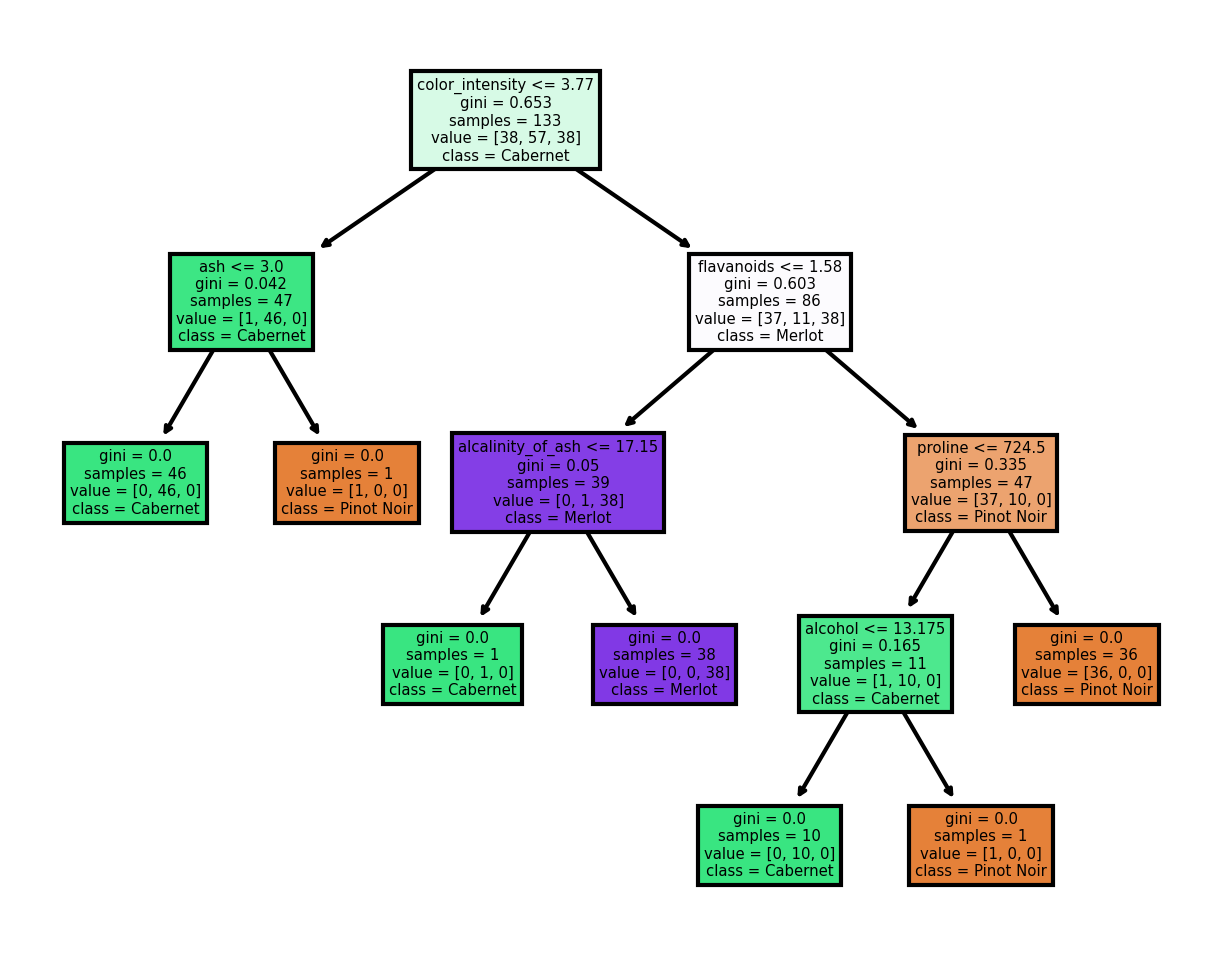

In [ ]:
fn=['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']
cn=['Pinot Noir', 'Cabernet', 'Merlot']
# plotting my tree with graphs for easier interpretation
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

array([[24,  0,  1],
       [ 1, 14,  0],
       [ 0,  0, 19]])

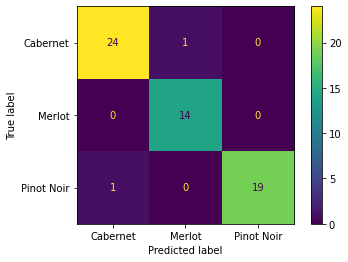

In [ ]:
# here i am just testing a random forest to see 
# the accuracy score between a DecisionTreeClassifier and a RandomForestClassifier
# I used n_estimators=10, then 100, and then 1000 (100 and 1000 does not make any 
# difference)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
X = pd.get_dummies(wine_df.drop('wine_class', axis=1))
y = wine_df['wine_class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

rfc = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=101)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
plot_confusion_matrix(rfc, X_test, y_test)
confusion_matrix(preds, y_test)


In [ ]:
# confirming that my accuracy score is somewhat accurate based on the calculation
# ("precision"+ "recall")/2 =   "f1-score"
# In conclusion, my accuracy score for all 3 classes is 0.966 which is
# similar to my DecisionTree Accuracy score above.

print(classification_report(y_test, preds, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn',))

              precision    recall  f1-score   support

    Cabernet       0.96      0.96      0.96        25
      Merlot       0.93      1.00      0.97        14
  Pinot Noir       1.00      0.95      0.97        20

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



     |████████████████████████████████| 127.6MB 72kB/s 
     |████████████████████████████████| 307kB 35.9MB/s 
     |████████████████████████████████| 276kB 39.5MB/s 
     |████████████████████████████████| 25.9MB 123kB/s 
     |████████████████████████████████| 14.5MB 214kB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 10.1MB 39.4MB/s 
     |████████████████████████████████| 256kB 38.1MB/s 
     |████████████████████████████████| 6.8MB 33.4MB/s 
     |████████████████████████████████| 1.2MB 41.8MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=dab45d7c06d7f8bf4a67ca9aeea6d27d6fa8e1021335cb08d3d70255f37c4ddd
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requiremen

In [ ]:
# I am just trying this out to see which Classifier gives the most
# accuracy score. This indicates which classifier you can use for your
# training and prediction in the real world
# I changed the test_size from 0.1, 0.2, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35
# the result is that RandomForest Classifier is always sitting on top 7
# however, DecisionTree Classifier is always on the bottom 5.
import lazypredict #importing lazypredict
from lazypredict.Supervised import LazyClassifier #lazy predict classifier
from sklearn.datasets import load_wine
X = pd.get_dummies(wine_df.drop('wine_class', axis=1))
y = wine_df['wine_class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

clf = LazyClassifier(verbose=0, ignore_warnings= True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models


100%|██████████| 29/29 [00:00<00:00, 29.45it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,1.00,1.00,None,1.00,0.02
PassiveAggressiveClassifier,1.00,1.00,None,1.00,0.02
LogisticRegression,1.00,1.00,None,1.00,0.03
CalibratedClassifierCV,1.00,1.00,None,1.00,0.05
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.01
RandomForestClassifier,1.00,1.00,None,1.00,0.17
ExtraTreesClassifier,1.00,1.00,None,1.00,0.13
Perceptron,0.98,0.99,None,0.98,0.02
LinearSVC,0.98,0.99,None,0.98,0.02
